In [1]:
from configuration.make_quam import *
from qm import QuantumMachinesManager, QuantumMachine
from qualang_tools.octave_tools import calibration_result_plotter as plotter

2024-11-04 09:30:37,199 - qm - INFO     - Starting session: b268b10a-75cf-413f-bf97-b83f9b8e7970


In [2]:
qmm = QuantumMachinesManager(
    host="172.16.33.101",
    cluster_name="Cluster_81",
    octave=qpu.octaves["oct1"].get_octave_config(),
)

qm = qmm.open_qm(qpu.generate_config())

/Users/paul/miniconda3/envs/QM/lib/python3.11/site-packages/qm/quantum_machines_manager.py:125: DeprecationWarning: QMM was opened with OctaveConfig. Please note that from QOP2.4.0 the octave devices are managed by the cluster setting in the QM-app. It is recommended to remove the OctaveConfig from the QMM instantiation.
  warnings.warn(


2024-11-04 09:30:43,590 - qm - INFO     - Performing health check
2024-11-04 09:30:43,940 - qm - WARNING  - Health check warning: Inter-OPX connectivity issues in OPX: con1. Missing ports are: 4, 3, 2, 1, 12, 11, 10, 9. See QM-App for more info.
2024-11-04 09:30:43,940 - qm - WARNING  - Health check warning: Inter-OPX connectivity issues in OPX: con2. Missing ports are: 4, 3, 2, 1, 12, 11, 10, 9. See QM-App for more info.
2024-11-04 09:30:43,940 - qm - INFO     - Health check passed


In [3]:
# qm.calibrate_element("resonator", lo_if_dict={qpu.channels["resonator"].LO_frequency: (qpu.channels["resonator"].intermediate_frequency)})
cal_output = qm.calibrate_element("resonator")

2024-11-04 09:30:52,728 - qm - INFO     - Compiling program


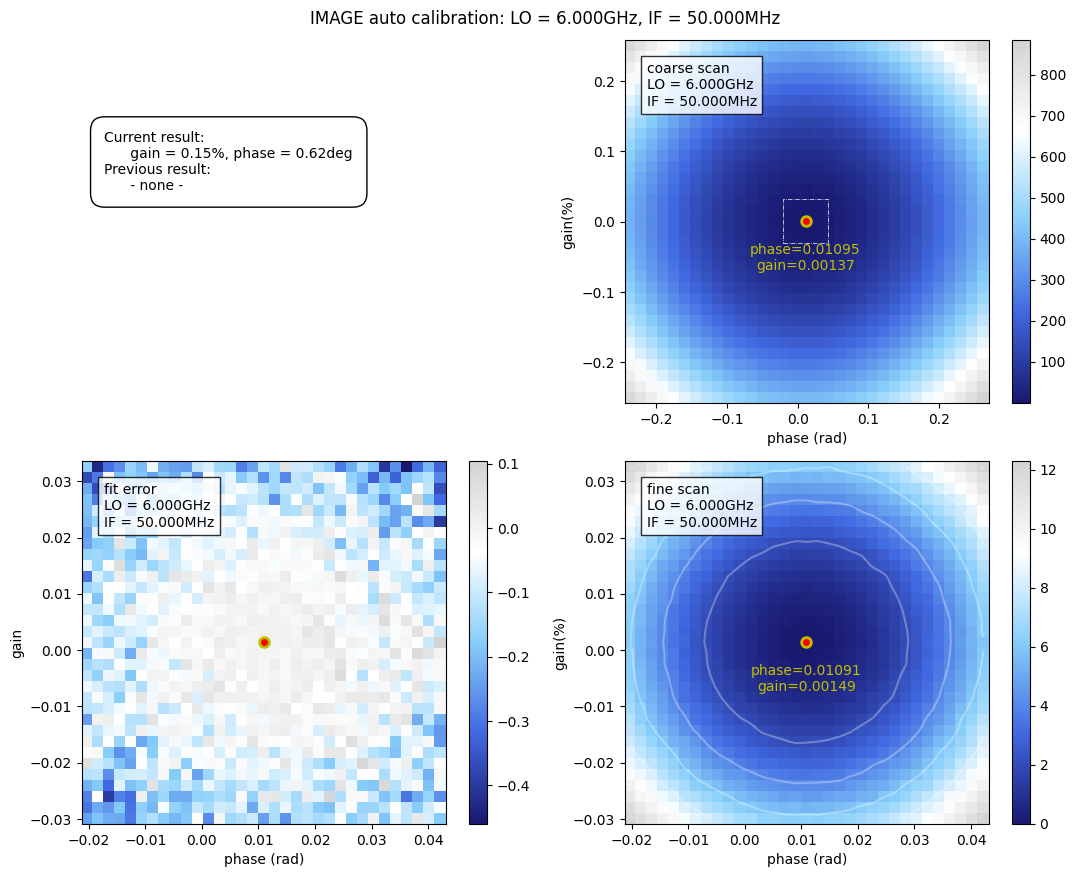

In [4]:
import importlib

importlib.reload(plotter)

plotter.show_if_result(cal_output)
